<a href="https://colab.research.google.com/github/Devesh4958/Data_Visualization-EDA/blob/main/SS_Dataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_context('notebook', font_scale=1.2)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%matplotlib inline

***Load DataSet***

In [2]:
df = pd.read_csv('/content/Sample - Superstore.csv.zip', encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


***Initial Data Exploration***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 21)

# Data Cleaning

***Checking Missing Values and Duplicate Values***

In [6]:
# Missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
# Remove duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [10]:
# Value count for key categorical features
for col in ['Category', 'Region']:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())


Value Counts for Category:
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Value Counts for Region:
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

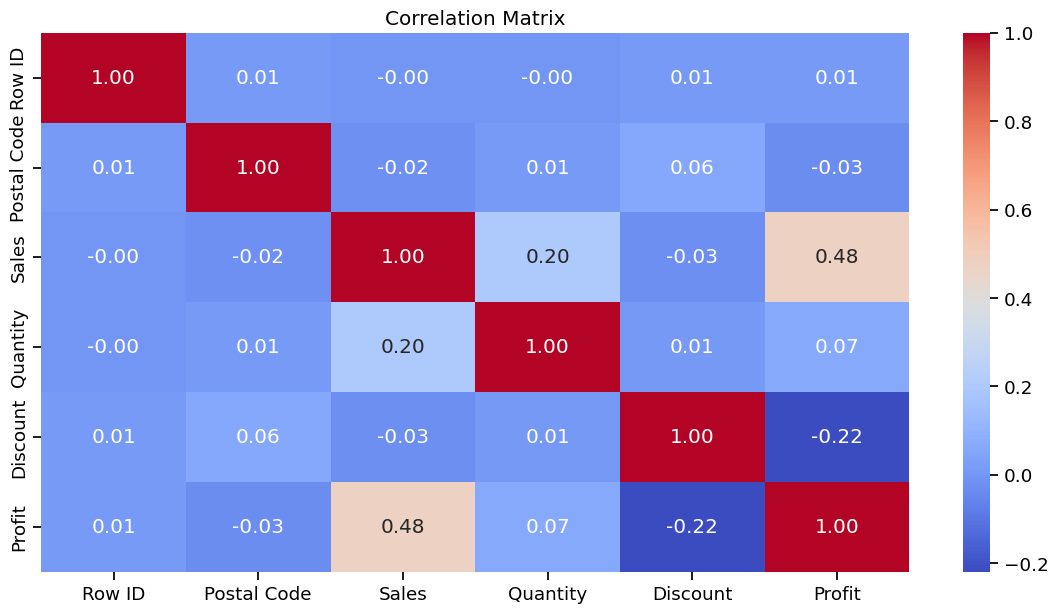

In [11]:
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

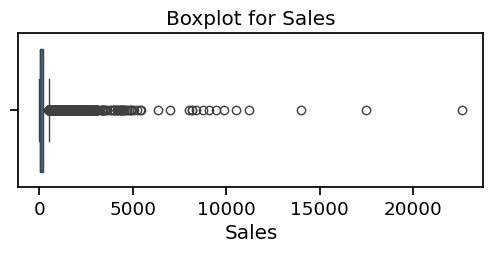

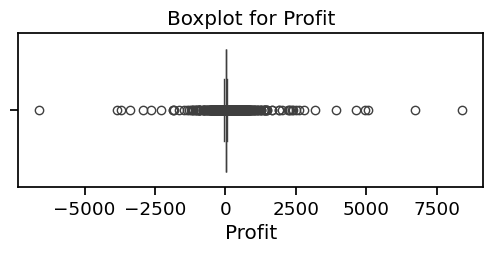

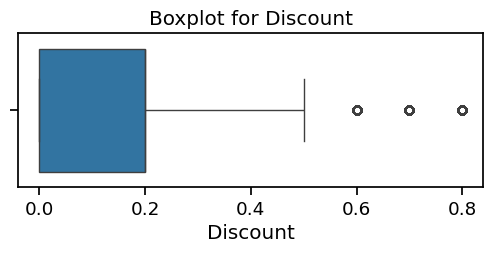

In [12]:
for col in ['Sales', 'Profit', 'Discount']:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [13]:
# Handling Outliers
q_low = df['Profit'].quantile(0.01)
q_high = df['Profit'].quantile(0.99)
df_clean = df[(df['Profit'] > q_low) & (df['Profit'] < q_high)]

In [14]:
df['YearMonth'] = df['Order Date'].dt.to_period('M')
df['OrderY'] = df['Order Date'].dt.year
df['OrderM'] = df['Order Date'].dt.month

In [15]:
df['Discounted Sales'] = df['Sales'] * (1 - df['Discount'])
df['Sales per Quantity'] = df['Sales'] / df['Quantity']
df['Profit Margin'] = df['Profit'] / df['Sales']
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

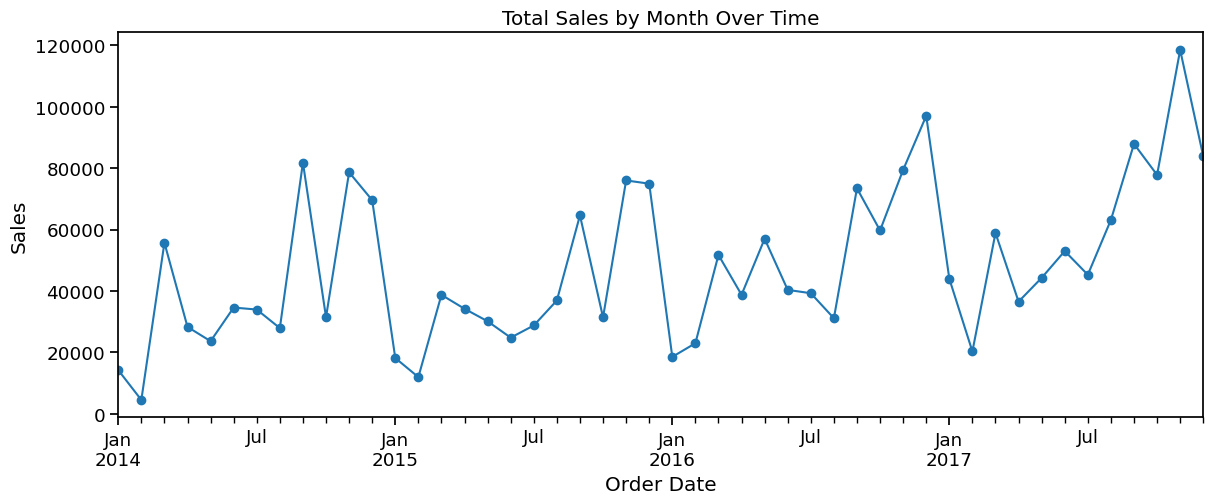

In [16]:
sales_month = df.groupby('YearMonth')['Sales'].sum()
plt.figure(figsize=(14,5))
sales_month.plot(marker='o')
plt.title('Total Sales by Month Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

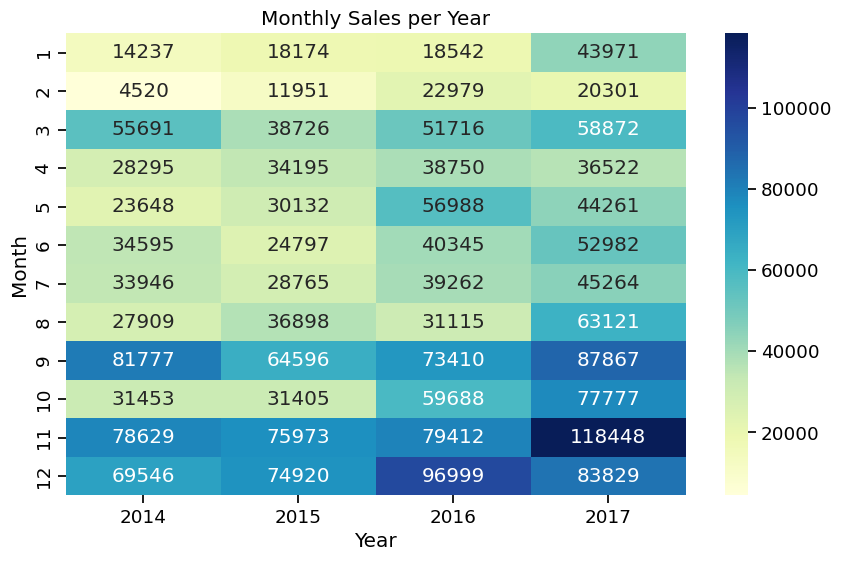

In [17]:
pivot = df.pivot_table(index='OrderM', columns='OrderY', values='Sales', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Monthly Sales per Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

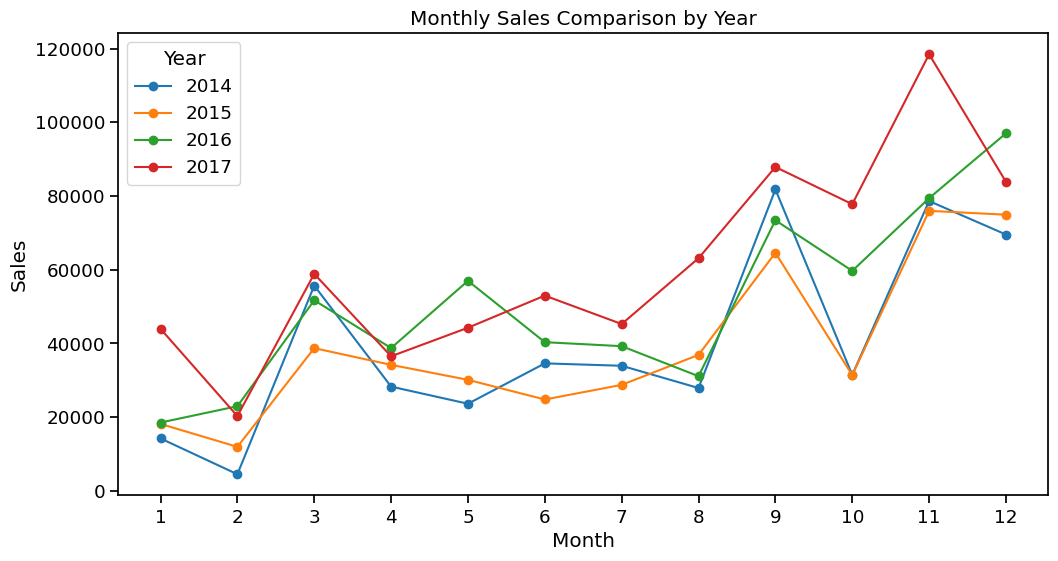

In [18]:
plt.figure(figsize=(12,6))
for year in pivot.columns:
    plt.plot(pivot.index, pivot[year], marker='o', label=str(year))

plt.title('Monthly Sales Comparison by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.xticks(pivot.index)
plt.show()

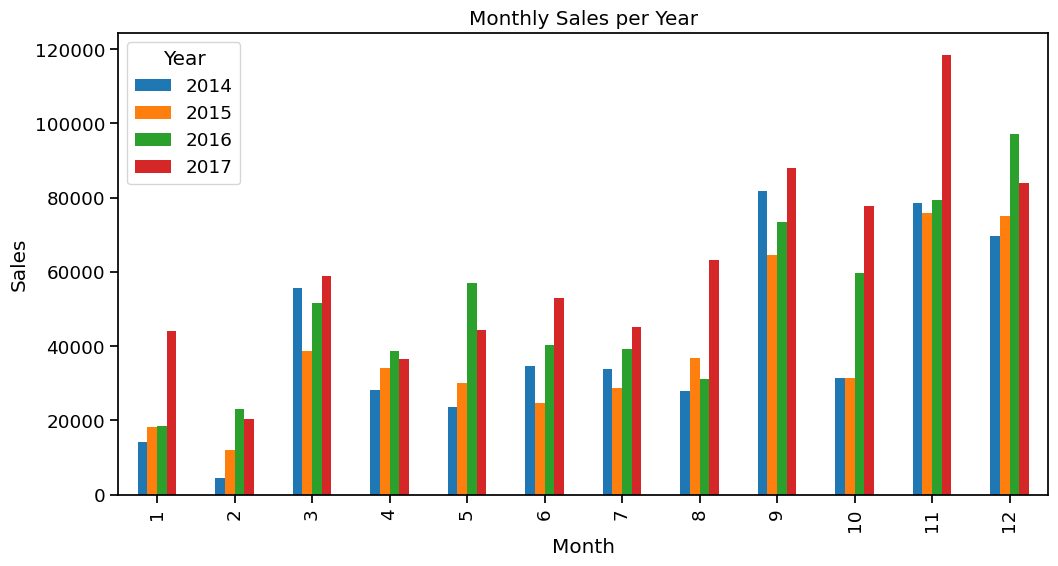

In [19]:
pivot.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Sales per Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

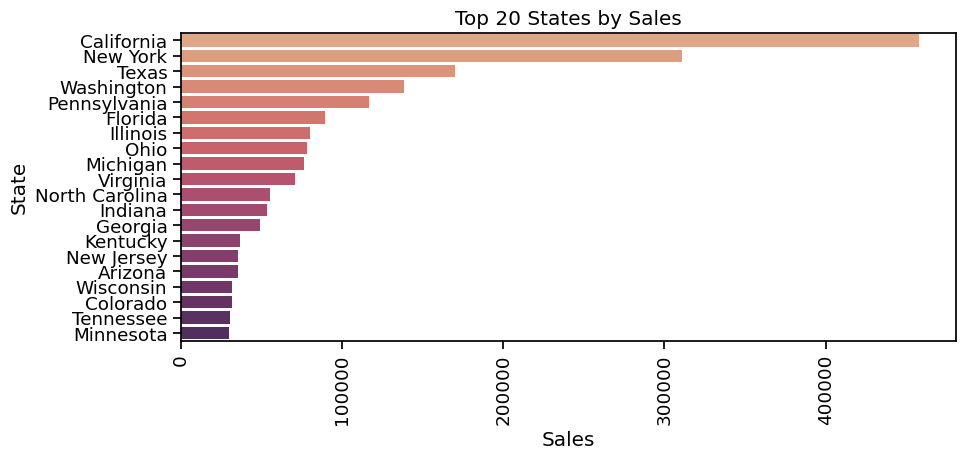

In [20]:
top_States = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,4))
sns.barplot(x=top_States.values, y=top_States.index, palette='flare')
plt.title('Top 20 States by Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.tick_params(axis='x', rotation=90)
plt.show()

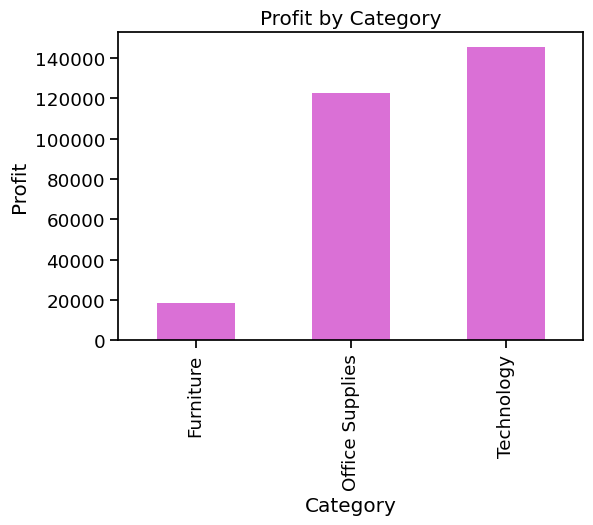

In [21]:
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values()
plt.figure(figsize=(6,4))
profit_by_category.plot(kind='bar', color='orchid', title='Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

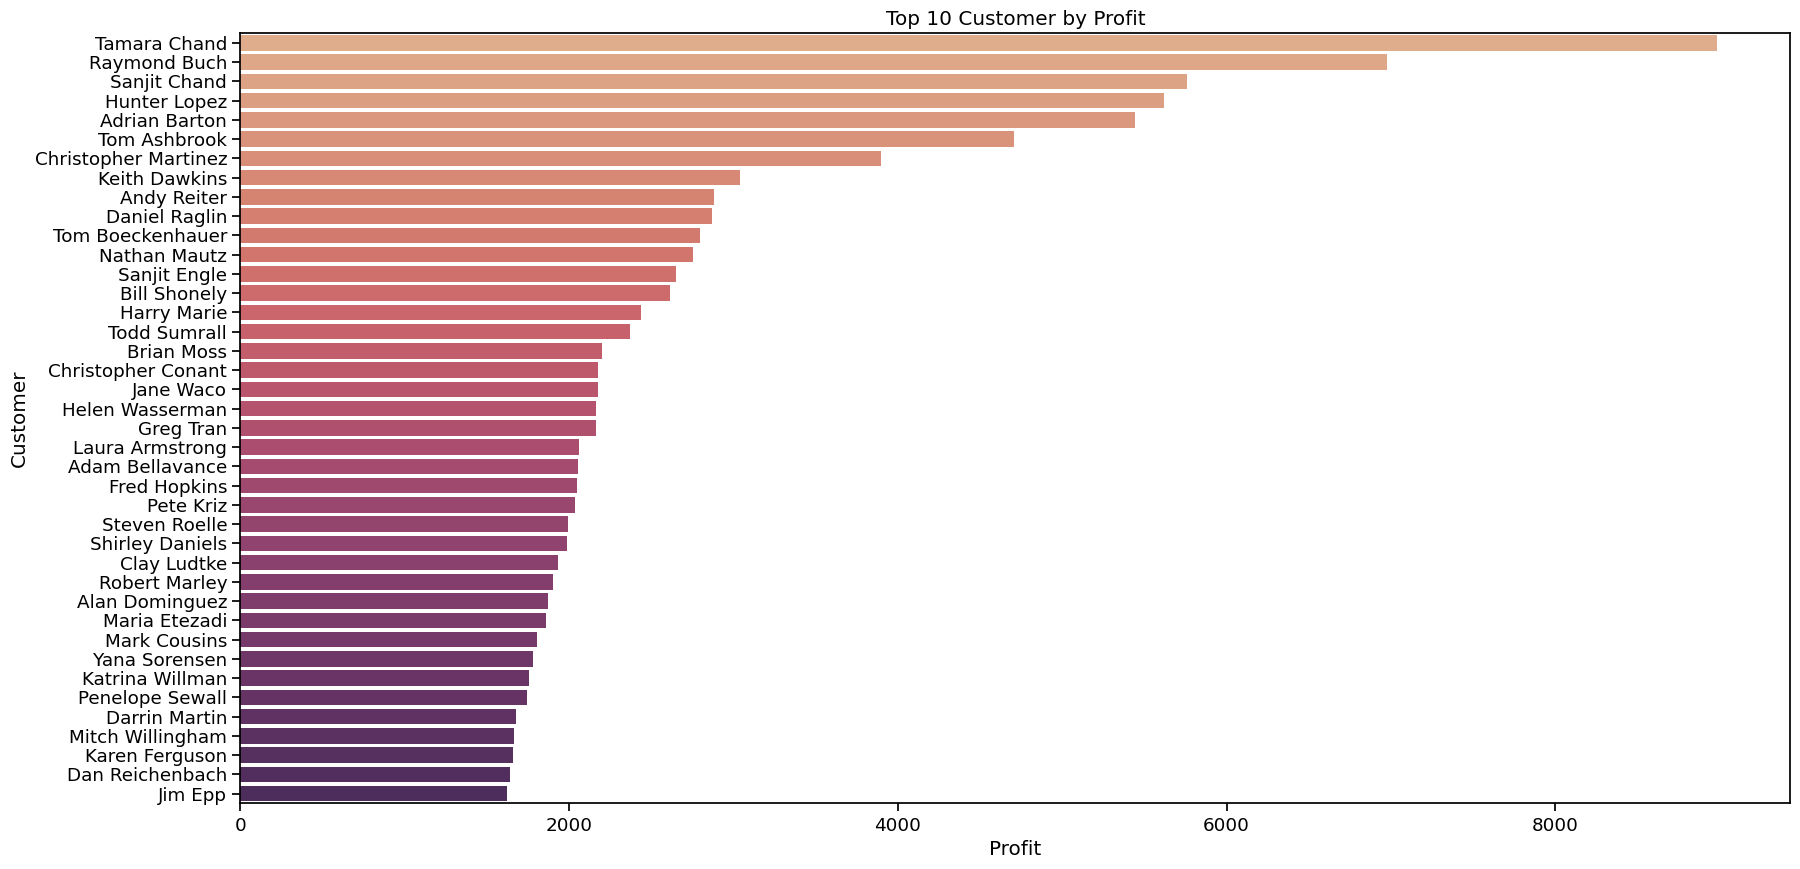

In [22]:
top_profit_customers = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(20,10))
sns.barplot(x=top_profit_customers.values, y=top_profit_customers.index , palette='flare')
plt.title('Top 10 Customer by Profit')
plt.xlabel('Profit')
plt.ylabel('Customer')
plt.show()

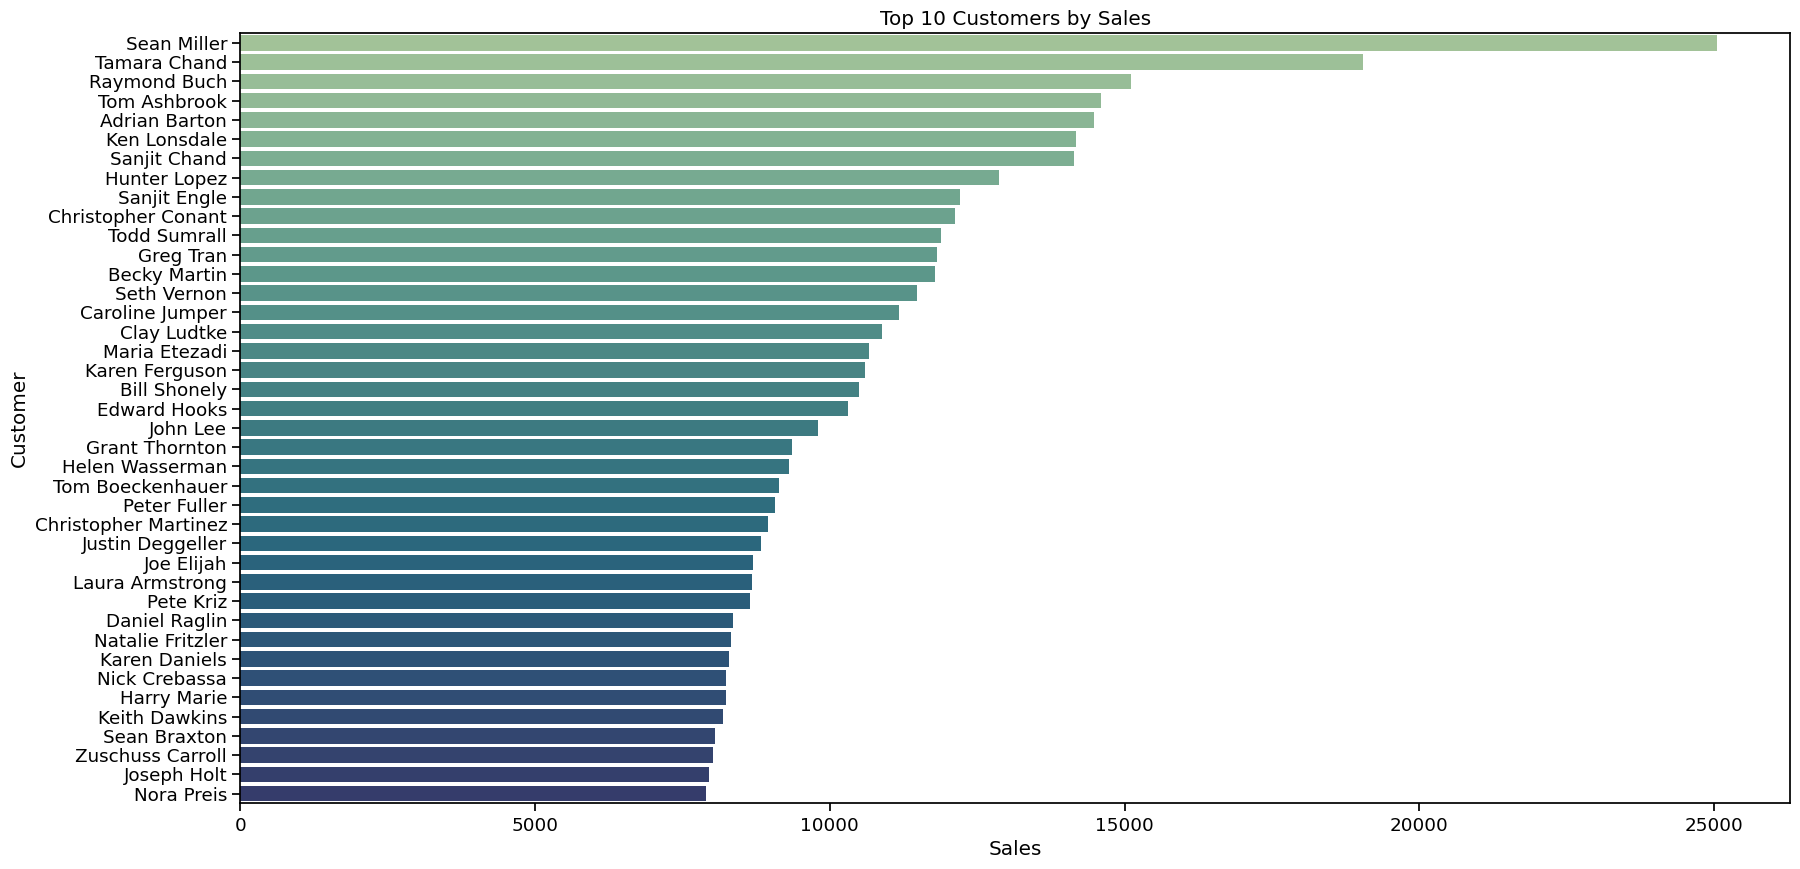

In [23]:
top_customrs = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(40)
plt.figure(figsize=(20,10))
sns.barplot(x=top_customrs.values, y=top_customrs.index, palette="crest")
plt.title('Top 10 Customers by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer')
plt.show()

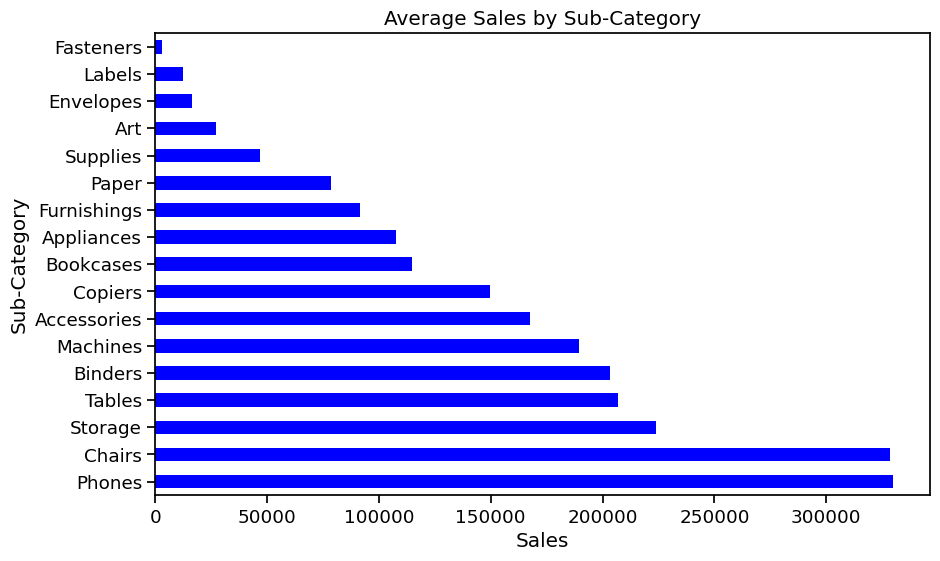

In [24]:
subcat_by_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
subcat_by_sales.plot(kind='barh', color='blue')
plt.title('Average Sales by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.show()

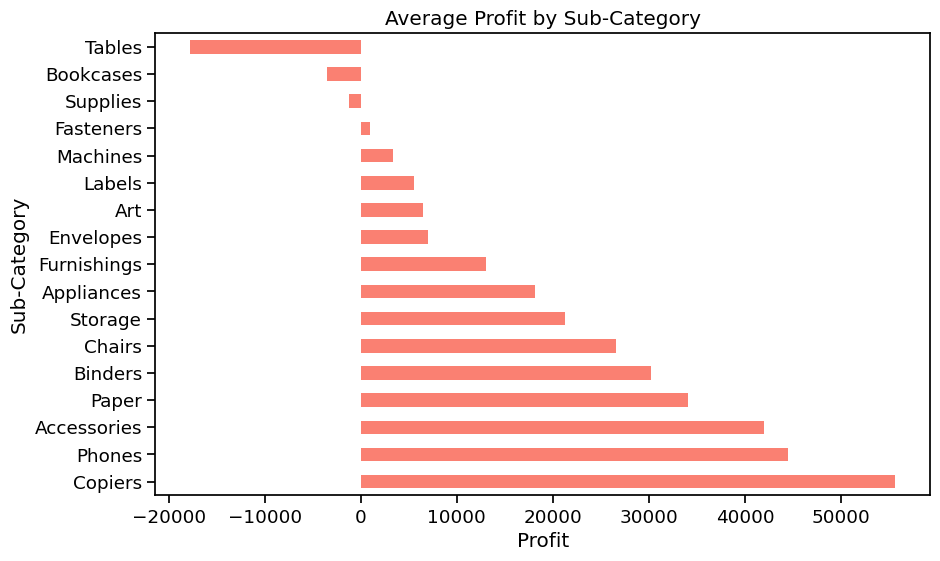

In [25]:
subcat_by_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
subcat_by_profit.plot(kind='barh', color='salmon')
plt.title('Average Profit by Sub-Category')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.show()

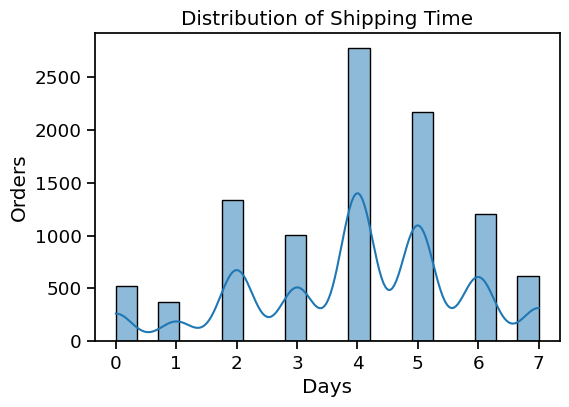

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df['Shipping Time'], bins=20 , kde=True)
plt.title('Distribution of Shipping Time')
plt.xlabel('Days')
plt.ylabel('Orders')
plt.show()